In [ ]:
using BeamLib
pa = BeamLib.PhasedArray1D(-6e-2, -2e-2, 2e-2, 6e-2)
weights = BeamLib.dsb_weights(pa, 3.75e9, deg2rad(110))
faxis = LinRange(3.7e9, 3.8e9, 1024)

1024-element LinRange{Float64, Int64}:
 3.7e9, 3.7001e9, 3.7002e9, 3.70029e9, …, 3.7998e9, 3.7999e9, 3.8e9

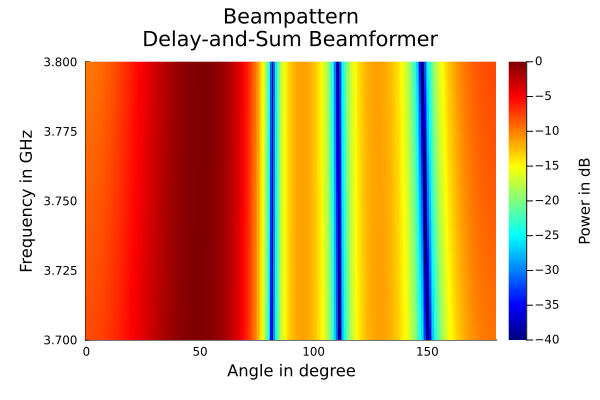

In [33]:
ϕaxis = LinRange(0, 180, 256)
W = Ref(weights').*BeamLib.steerphi.(Ref(pa), faxis, deg2rad.(ϕaxis)')
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")

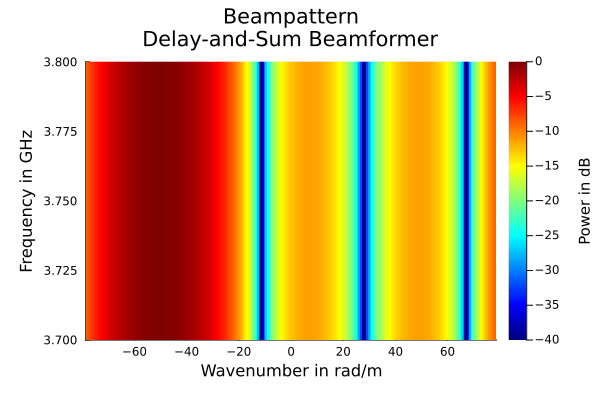

In [34]:
kxaxis = LinRange(-π/4e-2, π/4e-2, 256) # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
W = Ref(weights').*BeamLib.steerk.(Ref(pa), faxis, kxaxis')
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(kxaxis, faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Wavenumber in rad/m")
ylabel!("Frequency in GHz")

Note how the beampattern is not pinched/stretched for changing frequencies when plotted over a wavenumber axis. 